## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Github Repository: https://github.com/stacyshen/Obesity-ML-Models

Medium article: https://stacyy.medium.com/obesity-classification-and-data-analysis-via-machine-learning-6635682f0f87

In [1]:
#Import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,recall_score,precision_score,accuracy_score)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import FeatureImportances
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Upload dataset
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [3]:
#Load data into dataframe df and print first five datapoints to check accuracy before continuing
data=pd.read_csv("ObesityDataSet.csv")
data.head()


,Gender,Age,Height,Weight,family_history,FCHCF,FCV,NMM,CFBM,Smoke,CW,CCM,PAF,TUT,CA,Transportation,Obesity
0,1,21.0,1.62,64.0,1,2,2.0,3.0,2,2,2.0,2,0.0,1.0,1,4,2
1,1,21.0,1.52,56.0,1,2,3.0,3.0,2,1,3.0,1,3.0,0.0,2,4,2
2,2,23.0,1.80,77.0,1,2,2.0,3.0,2,2,2.0,2,2.0,1.0,3,4,2
3,2,27.0,1.80,87.0,2,2,3.0,3.0,2,2,2.0,2,2.0,0.0,3,5,2
4,2,22.0,1.78,89.8,2,2,2.0,1.0,2,2,2.0,2,0.0,0.0,2,4,2


In [4]:
# Returns the array dimensions
data.shape

(2111, 17)

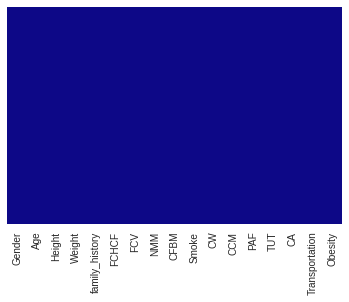

In [5]:
#Check if there are any missing values
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [6]:
#Correlation matrix
data.corr()

,Gender,Age,Height,Weight,family_history,FCHCF,FCV,NMM,CFBM,Smoke,CW,CCM,PAF,TUT,CA,Transportation,Obesity
Gender,1.000000,0.048394,0.618466,0.161668,-0.102512,-0.064934,-0.274505,0.067600,-0.091543,-0.044698,0.107930,0.102633,0.189607,0.017269,-0.007616,-0.137378,-0.001436
Age,0.048394,1.000000,-0.025958,0.202560,-0.205725,-0.063902,0.016291,-0.043944,-0.083739,-0.091987,-0.045304,0.116283,-0.144938,-0.296931,0.044487,-0.602317,0.217473
Height,0.618466,-0.025958,1.000000,0.463136,-0.247684,-0.178364,-0.038121,0.243672,-0.048818,-0.055499,0.213376,0.133753,0.294709,0.051912,0.129732,-0.071616,0.137413
Weight,0.161668,0.202560,0.463136,1.000000,-0.496820,-0.272300,0.216125,0.107469,-0.287493,-0.025746,0.200575,0.201906,-0.051436,-0.071561,0.206677,0.005742,0.793652
family_history,-0.102512,-0.205725,-0.247684,-0.496820,1.000000,0.208036,-0.040372,-0.071370,0.169787,0.017385,-0.147437,-0.185422,0.056673,-0.022943,0.036676,0.099229,-0.416607
FCHCF,-0.064934,-0.063902,-0.178364,-0.272300,0.208036,1.000000,0.027283,0.007000,0.150068,-0.050660,-0.009719,-0.190658,0.107995,-0.068417,-0.089520,0.071444,-0.278355
FCV,-0.274505,0.016291,-0.038121,0.216125,-0.040372,0.027283,1.000000,0.042216,0.054670,-0.014320,0.068461,-0.071852,0.019939,-0.101135,0.060781,0.063746,0.174848
NMM,0.067600,-0.043944,0.243672,0.107469,-0.071370,0.007000,0.042216,1.000000,0.097801,-0.007811,0.057088,0.015624,0.129504,0.036326,0.071747,-0.052962,0.037004
CFBM,-0.091543,-0.083739,-0.048818,-0.287493,0.169787,0.150068,0.054670,0.097801,1.000000,-0.055282,-0.144995,-0.109179,0.030110,0.048567,-0.047540,0.044931,-0.232819
Smoke,-0.044698,-0.091987,-0.055499,-0.025746,0.017385,-0.050660,-0.014320,-0.007811,-0.055282,1.000000,0.031995,0.047731,-0.011216,-0.017613,-0.082471,0.013098,-0.011578


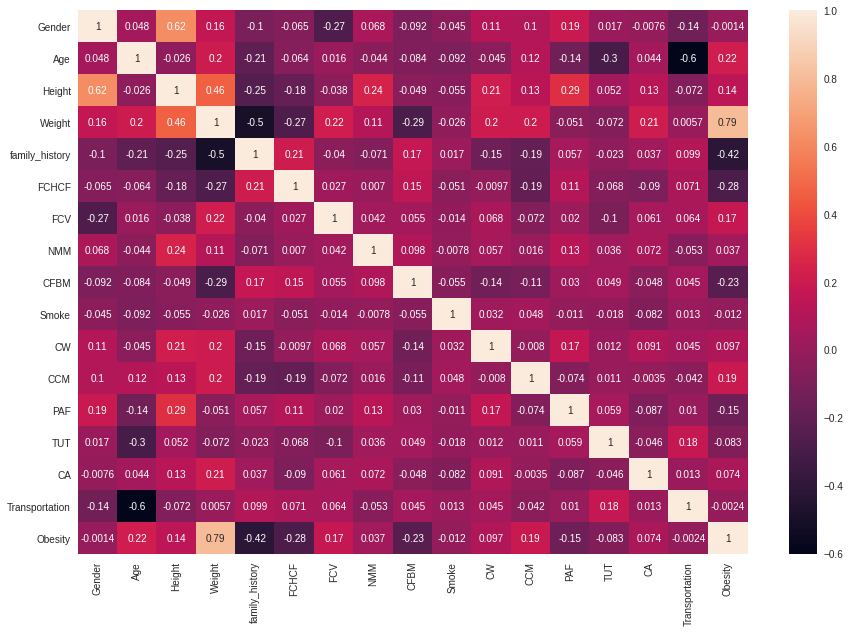

In [7]:
#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

In [8]:
#Drop the weight variable
data.drop(['Weight'],axis = 1, inplace = True)

In [9]:
#Return columns
print(data.keys(), "\n")

#Return array dimensions
print(data.shape, "\n")

#Dataframe summary
data.info()

#Summarize  central tendency, dispersion, and shape of a dataset’s distribution
data.describe()

Index(['Gender', 'Age', 'Height', 'family_history', 'FCHCF', 'FCV', 'NMM',
       'CFBM', 'Smoke', 'CW', 'CCM', 'PAF', 'TUT', 'CA', 'Transportation',
       'Obesity'],
      dtype='object') 

(2111, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int64  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   family_history  2111 non-null   int64  
 4   FCHCF           2111 non-null   int64  
 5   FCV             2111 non-null   float64
 6   NMM             2111 non-null   float64
 7   CFBM            2111 non-null   int64  
 8   Smoke           2111 non-null   int64  
 9   CW              2111 non-null   float64
 10  CCM             2111 non-null   int64  
 11  PAF             2111 non-null   float64
 12  TUT             2111 non-null   float64
 13  CA     

,Gender,Age,Height,family_history,FCHCF,FCV,NMM,CFBM,Smoke,CW,CCM,PAF,TUT,CA,Transportation,Obesity
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1.505921,24.312600,1.701677,1.182378,1.116059,2.419043,2.685628,2.140692,1.979157,2.008011,1.954524,1.010298,0.657866,1.731407,3.363335,2.920891
std,0.500083,6.345968,0.093305,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.262721,0.997102
min,1.000000,14.000000,1.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,1.000000,19.947192,1.630000,1.000000,1.000000,2.000000,2.658738,2.000000,2.000000,1.584812,2.000000,0.124505,0.000000,1.000000,4.000000,2.000000
50%,2.000000,22.777890,1.700499,1.000000,1.000000,2.385502,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.625350,2.000000,4.000000,2.000000
75%,2.000000,26.000000,1.768464,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.477420,2.000000,1.666678,1.000000,2.000000,4.000000,4.000000
max,2.000000,61.000000,1.980000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,4.000000,5.000000,4.000000


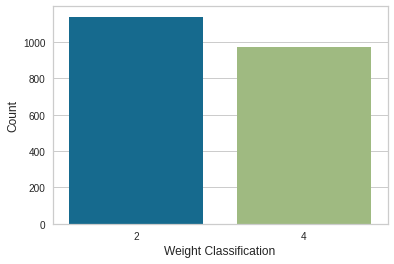

In [10]:
#Distribution of the target variable via countplot
sns.countplot(x='Obesity', data=data)
plt.xlabel("Weight Classification", size=12)
plt.ylabel("Count", size=12)
plt.show()

In [11]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(data)
cols = ['Gender', 'Age', 'Height', 'family_history','FCHCF','FCV','NMM','CFBM','Smoke','CW','CCM', 'PAF','TUT','CA','Transportation','Obesity']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

   Gender       Age    Height  ...        CA  Transportation  Obesity
0     0.0  0.148936  0.320755  ...  0.000000            0.75      0.0
1     0.0  0.148936  0.132075  ...  0.333333            0.75      0.0
2     1.0  0.191489  0.660377  ...  0.666667            0.75      0.0
3     1.0  0.276596  0.660377  ...  0.666667            1.00      0.0
4     1.0  0.170213  0.622642  ...  0.333333            0.75      0.0

[5 rows x 16 columns]


In [12]:
#Store the feature and target variable
X = normalizedData.iloc[:, :-1]
y = normalizedData.iloc[:, -1]

print(normalizedData.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2111, 16)
(2111, 15)
(2111,)
(1477, 15)
(634, 15)
(1477,)
(634,)


In [13]:
# Compute the baseline classification accuracy for X_train
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5457413249211357


Model #1: Logistic Regression

In [14]:
#Logistic regression accuracy
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, y_pred))

#cross-validation
cv1 = cross_val_score(logReg, X, y, scoring='accuracy', cv=10)
cv1 = pd.Series(cv1)
print("Cross-validation: ", cv1.mean())


Accuracy of predictions: 0.7791798107255521
Cross-validation:  0.7101068586246981


In [15]:
#GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [150, 100, 75, 50, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.757221 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [16]:
#Log reg with grid search hyperparameters
gridLogReg = LogisticRegression(random_state = 42, penalty = "l2", C = 100, solver = "liblinear")
gridLogReg.fit(X_train, y_train)
grid_pred = gridLogReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, grid_pred))
#cross-validation
gridcv = cross_val_score(gridLogReg, X, y, scoring='accuracy', cv=10)
gridcv = pd.Series(gridcv)
print("Cross-validation: ", gridcv.mean())


Accuracy of predictions: 0.7870662460567823
Cross-validation:  0.7200549941876062


In [ ]:
#RandomizedSearchCV
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-4, 200)
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
rsearch = RandomizedSearchCV(estimator=logReg, param_distributions = space, n_iter = 10, n_jobs=-1, cv=cv2, scoring='accuracy',error_score=0, random_state = 42)
rsearch = rsearch.fit(X, y)
print("Best: %f using %s" % (rsearch.best_score_, rsearch.best_params_))

Best: 0.754094 using {'C': 0.7166439561498453, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Log reg with randomized search hyperparameters
ranLogReg = LogisticRegression(random_state = 42, penalty = "l2", C = 0.7166439561498453, solver = "liblinear")
ranLogReg.fit(X_train, y_train)
ran_pred = ranLogReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, ran_pred))
#cross-validation 
rancv = cross_val_score(ranLogReg, X, y, scoring='accuracy', cv=10)
rancv = pd.Series(rancv)
print("Cross-validation: ", rancv.mean())

Accuracy of predictions: 0.7791798107255521
Cross-validation:  0.7115308951086471


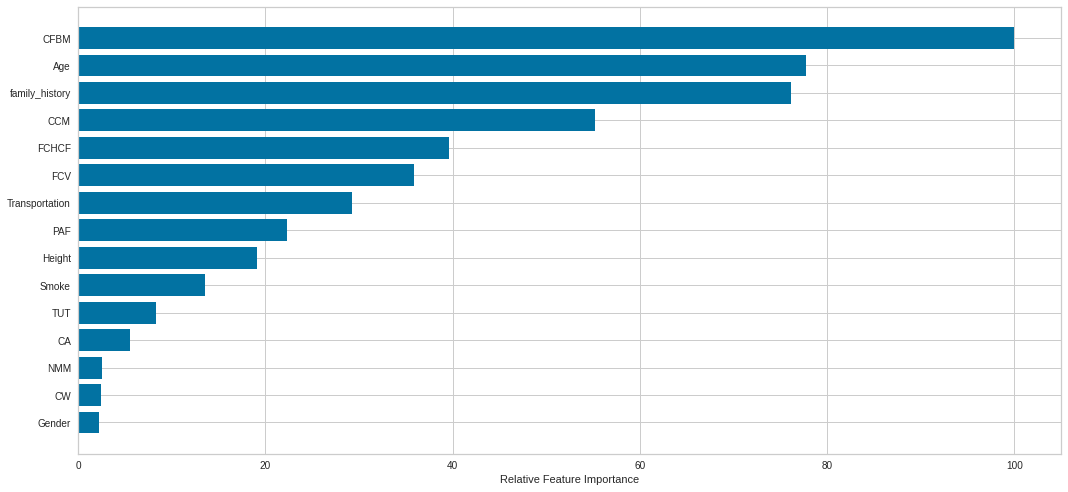

In [ ]:
#Log reg feature importance visualization
feature_importance = abs(gridLogReg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(15,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()


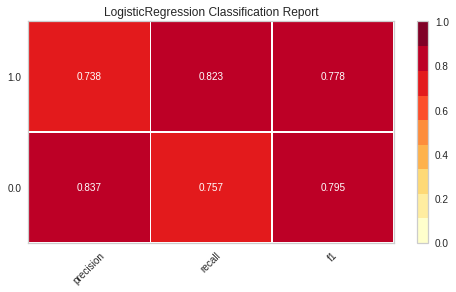

In [ ]:
#Log reg classification report visualizer
visualizer = ClassificationReport(gridLogReg, size=(500, 300))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Model #2: Bagging Classifier

Text(0, 0.5, 'Testing Accuracy')

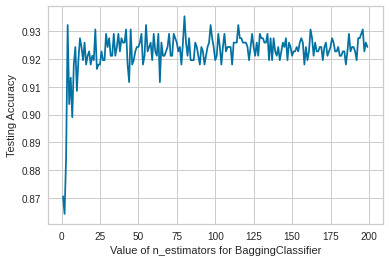

In [ ]:
#Bagging n_estimator and testing accuracy
scoresbag =[]
for k in range(1, 200):
    bgc = BaggingClassifier(n_estimators=k)
    bgc.fit(X_train, y_train)
    y_predbag = bgc.predict(X_test)
    scoresbag.append(accuracy_score(y_test, y_predbag))
%matplotlib inline
plt.plot(range(1, 200), scoresbag)
plt.xlabel('Value of n_estimators for BaggingClassifier')
plt.ylabel('Testing Accuracy')

In [ ]:
# Generic Bagging model
base_est1 = DecisionTreeClassifier()
model_bagging = BaggingClassifier(base_est1,n_estimators = 79, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Accuracy = ', acc_bagging)
#cross-validation
bagcv = cross_val_score(model_bagging, X, y, scoring='accuracy', cv=10)
bagcv = pd.Series(bagcv)
print("Cross-validation: ", bagcv.mean())

Accuracy =  0.9305993690851735
Cross-validation:  0.9214454976303317


In [ ]:
#Bagging classification report
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       346
         1.0       0.92      0.92      0.92       288

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



Model #3: Random Forest Classifer

Text(0, 0.5, 'Testing Accuracy')

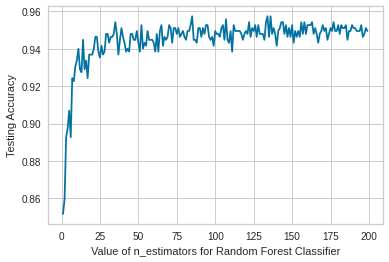

In [ ]:
#Random forest n_estimator and testing accuracy
scoresrf =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_predrf = rfc.predict(X_test)
    scoresrf.append(accuracy_score(y_test, y_predrf))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scoresrf)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
#Random Forest model
model_rf = RandomForestClassifier(n_estimators=132, max_features= 6, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy:", accuracy_rf)
#cross-validation
rfcv = cross_val_score(model_rf, X, y, scoring='accuracy', cv=10)
rfcv = pd.Series(rfcv)
print("Cross-validation: ", rfcv.mean())

Accuracy: 0.9479495268138801
Cross-validation:  0.9403961369936511


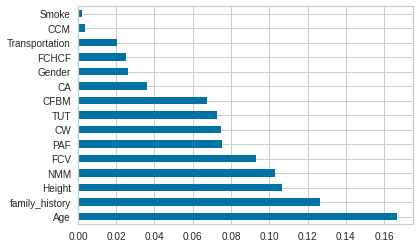

In [ ]:
#Random forest feature importance
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', )

In [ ]:
# Top 3 features for RandomForest
rimp=pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
rfimp = (rimp.sort_values(1, ascending = False))
print("Three most important features: \n", rfimp.iloc[:3])

Three most important features: 
                 0         1
1             Age  0.166656
3  family_history  0.126444
2          Height  0.106609


In [ ]:
#oob score
model_rf_oob = RandomForestClassifier(n_estimators=132, max_features=6, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.9485
Testing Accuracy:		 0.9479
Acc. Difference:		 0.0006


Model #4: AdaBooster Classifier

Text(0, 0.5, 'Testing Accuracy')

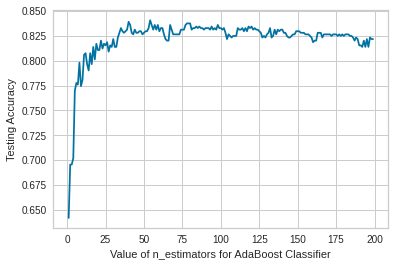

In [ ]:
#adaboost n_estimator and testing accuracy
scoresada =[]
for k in range(1, 200):
    adac = AdaBoostClassifier(n_estimators=k)
    adac.fit(X_train, y_train)
    y_predada = adac.predict(X_test)
    scoresada.append(accuracy_score(y_test, y_predada))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scoresada)
plt.xlabel('Value of n_estimators for AdaBoost Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
# AdaBoost Classification
base_est2 = DecisionTreeClassifier(max_depth = 7)
ada_boost = AdaBoostClassifier(base_est2, n_estimators=55, random_state=42, learning_rate=0.5)
ada_boost.fit(X_train, y_train)
predict_bs = ada_boost.predict(X_test)
accuracy_bs = accuracy_score(y_test, predict_bs)
print("Accuracy: ", accuracy_bs)

#cross-validation
adacv = cross_val_score(ada_boost, X, y, scoring='accuracy', cv=10)
adacv = pd.Series(adacv)
print("Cross validation: ", adacv.mean())

Accuracy:  0.9511041009463722
Cross validation:  0.9422762228382366


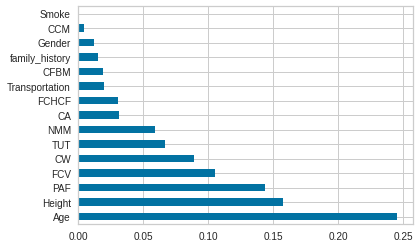

In [ ]:
#AdaBoost feature importance
ada_importances = pd.Series(ada_boost.feature_importances_, index=X.columns)
ada_importances.nlargest(20).plot(kind='barh')

In [ ]:
# Top 3 features for AdaBoost
aimp=pd.DataFrame(zip(X_train.columns, ada_boost
                     .feature_importances_))
adimp = (aimp.sort_values(1, ascending = False))
print("Three most important features: \n", adimp.iloc[:3])

Three most important features: 
          0         1
1      Age  0.244888
2   Height  0.157121
11     PAF  0.144009


Model #5: Gradient Boosting Classifier

Text(0, 0.5, 'Testing Accuracy')

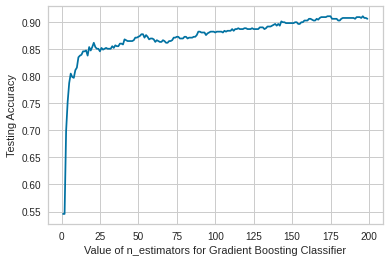

In [ ]:
#gradient boosting n_estimator and testing accuracy
scoresgbc =[]
for k in range(1, 200):
    gbc = GradientBoostingClassifier(n_estimators=k)
    gbc.fit(X_train, y_train)
    y_predgbc = gbc.predict(X_test)
    scoresgbc.append(accuracy_score(y_test, y_predgbc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scoresgbc)
plt.xlabel('Value of n_estimators for Gradient Boosting Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 170, random_state=42, max_depth = 8,learning_rate = 0.78).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, gbc_pred)
print("Accuracy:", accuracy_gbc)

#cross-validation
gbccv = cross_val_score(gbc, X, y, scoring='accuracy', cv=10)
gbccv = pd.Series(gbccv)
print("Cross-validation: ", gbccv.mean())

Accuracy: 0.9400630914826499
Cross-validation:  0.9323415004918179


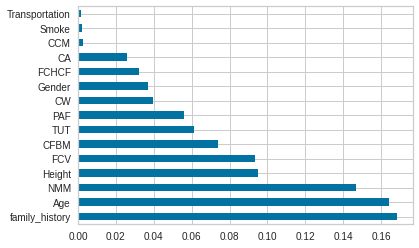

In [ ]:
#Gradient Boost feature importance
gbc_importances = pd.Series(gbc.feature_importances_, index=X.columns)
gbc_importances.nlargest(20).plot(kind='barh')

In [ ]:
# Top 3 features for Gradient Boosting
gimp=pd.DataFrame(zip(X_train.columns,gbc
                     .feature_importances_))
gbimp = (gimp.sort_values(1, ascending = False))
print("Three most important features: \n", gbimp.iloc[:3])

Three most important features: 
                 0         1
3  family_history  0.168293
1             Age  0.164423
6             NMM  0.146965


Voting Classifier

In [ ]:
#Voting Classifier
rfClf = RandomForestClassifier(n_estimators=132, max_features= 6, random_state=42)
baClf = BaggingClassifier(base_est1,n_estimators = 79, random_state = 42)
gbClf = GradientBoostingClassifier(n_estimators = 170, random_state=42, max_depth = 8,learning_rate = 0.78).fit(X_train, y_train)
adaClf = AdaBoostClassifier(base_est2, n_estimators=55, random_state=42, learning_rate=0.5)
vclf = VotingClassifier(estimators = [('rf',rfClf), ('ba', baClf), ('gbc',gbClf), ('ada', adaClf)], voting='soft') 
vclf.fit(X_train, y_train)
vclf_pred = vclf.predict(X_test)
accuracy_voting = accuracy_score(y_test, vclf_pred)
print('Accuracy score', accuracy_voting)
#cross-validation
vcv = cross_val_score(vclf, X, y, scoring='accuracy', cv=10)
vcv = pd.Series(vcv)
print("Cross-validation: ", vcv.mean())

Accuracy score 0.9526813880126183
Cross-validation:  0.9446548332290083
